# Objectives


To get insights into factors that influence property prices, popular neighborhoods, and the overall trend in the rental market. 

1. Dataset Cleanup and pre-processing
2. Data Visualization and Trend Analysis

# Features

1. property details, 
2. prices, 
3. availability, 
4. reviews, 
5. and neighborhood information.

# import essential library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load Dataset

In [28]:
df = pd.read_csv(r"C:\Users\snaji\OneDrive\Documents\Consultant Work\Airbnb_Open_Data.csv", parse_dates=['last review'])
df.head()

C:\Users\snaji\AppData\Local\Temp\ipykernel_6076\2184084078.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\snaji\OneDrive\Documents\Consultant Work\Airbnb_Open_Data.csv", parse_dates=['last review'])


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [29]:
#check the datatype and print the dataset size
df.dtypes, df.shape


(id                                         int64
 NAME                                      object
 host id                                    int64
 host_identity_verified                    object
 host name                                 object
 neighbourhood group                       object
 neighbourhood                             object
 lat                                      float64
 long                                     float64
 country                                   object
 country code                              object
 instant_bookable                          object
 cancellation_policy                       object
 room type                                 object
 Construction year                        float64
 price                                     object
 service fee                               object
 minimum nights                           float64
 number of reviews                        float64
 last review                       datetime64[ns]


We have 26 features to work with some of these features we will remove them such as country name or code

# Data Cleaning 

In [30]:
# first we can rename columns to the convensational standard
df.rename(columns = {'host id':'HostId','host name':'HostName',
                     'neighbourhood group':'NeighbourhoodGroup',
                     'country code':'countryCode','room type':'roomType',
                     'Construction year':'constructionYear','service fee':'serviceFee',
                     'minimum nights':'minimumNights','number of reviews':'numberOfReviews',
                     'last review':'lastReview','reviews per month':'reviewsPerMonth',
                     'review rate number':'reviewRateNumber','calculated host listings count':'calculatedHostListingsCount',
                     'availability 365':'availability'}, inplace = True)

In [31]:
# remove some features from the dataframe
df.drop(['country','countryCode','id','NAME','HostName','house_rules'],axis=1,inplace=True)

In [32]:
df['price'].head(3), df['serviceFee'].head()

(0    $966 
 1    $142 
 2    $620 
 Name: price, dtype: object,
 0    $193 
 1     $28 
 2    $124 
 3     $74 
 4     $41 
 Name: serviceFee, dtype: object)

The price and serviceFee has the "$" sign on the left-hand side, and replace commas with space then convert them to float

In [33]:
df['price'] = df['price'].str.lstrip('$').str.replace(',','').astype(float)
df['serviceFee'] = df['serviceFee'].str.lstrip("$").str.replace(',','').astype(float)


In [34]:
df['constructionYear'] = df['constructionYear'].astype('Int64')
df['price'].head(3), df['serviceFee'].head()

(0    966.0
 1    142.0
 2    620.0
 Name: price, dtype: float64,
 0    193.0
 1     28.0
 2    124.0
 3     74.0
 4     41.0
 Name: serviceFee, dtype: float64)

In [35]:
#check the min and max build year of the houses 
df['constructionYear'].min(), df['constructionYear'].max()

(2003, 2022)

In [42]:
# Maybe it is also good to check for room types
print(df['roomType'].head())
print(f"number of unique room types {df['roomType'].nunique()} ")

0       Private room
1    Entire home/apt
2       Private room
3    Entire home/apt
4    Entire home/apt
Name: roomType, dtype: object
number of unique room types 4 


In [48]:
df['lastReviewYear'] = pd.DatetimeIndex(df['lastReview']).year

In [50]:
df['lastReviewYear'].unique()

array([2021., 2022.,   nan, 2019., 2018., 2017., 2016., 2015., 2024.,
       2013., 2025., 2014., 2058., 2026., 2040., 2012., 2020.])

# Data Exploration

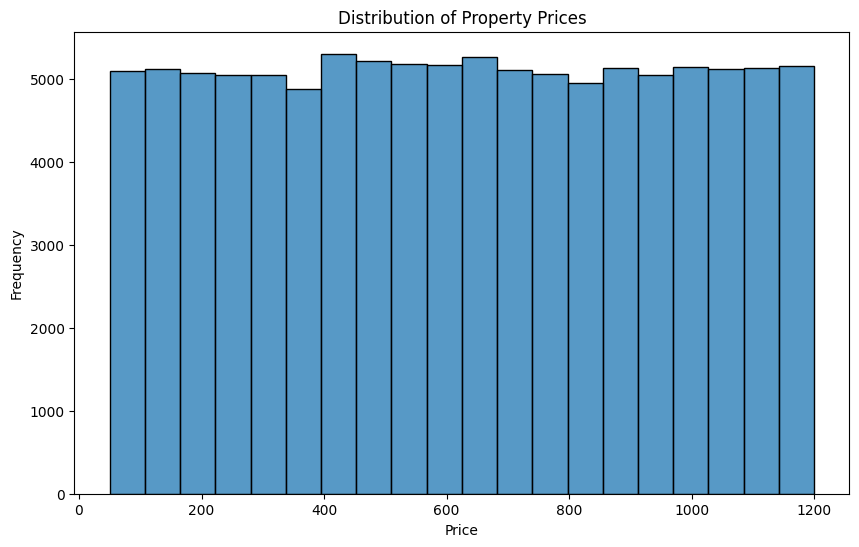

In [43]:
# Distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

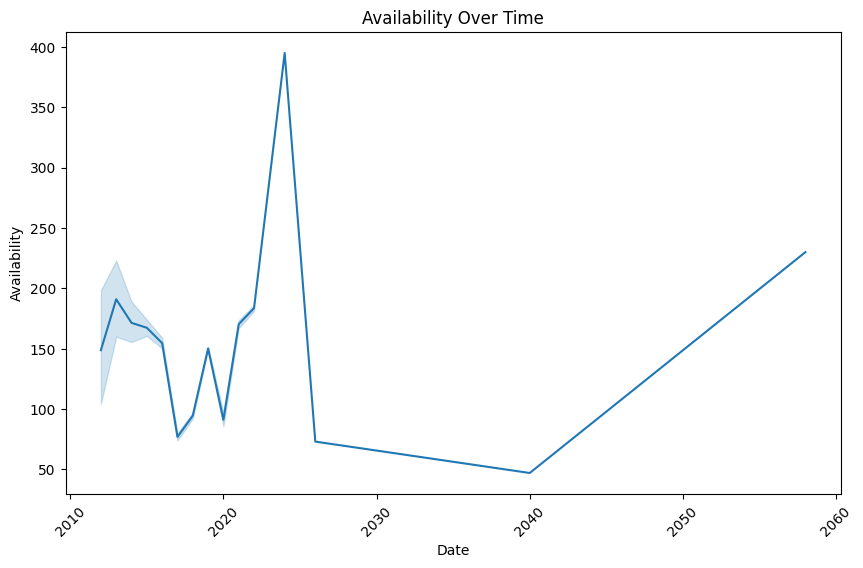

In [49]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='lastReviewYear', y='availability-365', data=df)
plt.title('Availability Over Time')
plt.xlabel('Year')
plt.ylabel('Availability')
plt.xticks(rotation=45)
plt.show()

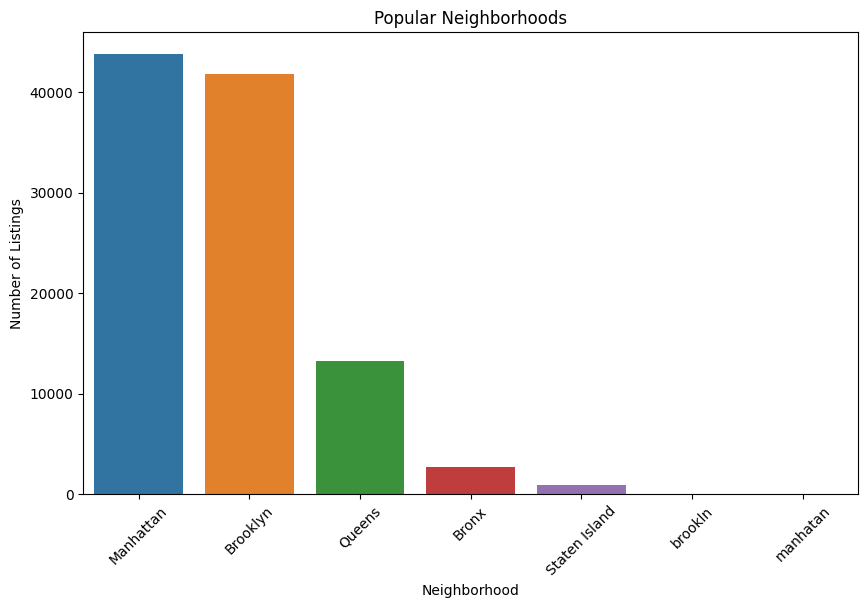

In [51]:
# Popular neighborhoods and property types
plt.figure(figsize=(10, 6))
sns.countplot(x='NeighbourhoodGroup', data=df, order=df['NeighbourhoodGroup'].value_counts().index)
plt.title('Popular Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighborhood', data=airbnb_data, order=airbnb_data['neighborhood'].value_counts().index)
plt.title('Popular Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()